# **Libraries**

In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

# **Import EMG Feature (CSV file)**

In [34]:
df = pd.read_csv(r"C:\Users\hpalm\Desktop\Programacion\Datos_6000_MYO\Caracteristicas_@\p01-caracteristicas.csv")
df

,EMAV,EWL,MAV,WL,ZC,SSC,RMS,AAC,DASDV,LD,MMAV,MMAV2,MYOP,SSI,VAR,WAMP,MFL,Label
0,0.249385,16.725057,0.127188,10.500000,28,5,0.174986,0.214286,0.290942,0.0,0.101328,0.101069,0.0,1.531006,0.030615,142,0.308904,0
1,0.345478,22.345027,0.213594,17.648438,30,9,0.278894,0.360172,0.468100,0.0,0.180547,0.181525,0.0,3.889099,0.077713,121,0.515437,0
2,0.348532,20.233636,0.215312,15.507812,27,5,0.286535,0.316486,0.430255,0.0,0.171719,0.168937,0.0,4.105103,0.081774,105,0.478824,0
3,0.198188,11.331826,0.089531,6.460938,24,6,0.133596,0.131856,0.206220,0.0,0.071094,0.070806,0.0,0.892395,0.017807,102,0.159428,0
4,0.165035,9.825415,0.063281,4.921875,28,6,0.086356,0.100446,0.132920,0.0,0.048594,0.046594,0.0,0.372864,0.007408,61,-0.031311,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11419,0.064414,2.109120,0.012031,0.453125,2,2,0.014192,0.009247,0.011916,0.0,0.008984,0.008788,0.0,0.010071,0.000085,111,-1.078758,5
11420,0.058943,2.338054,0.010781,0.429688,2,16,0.012742,0.008769,0.010992,0.0,0.007969,0.007856,0.0,0.008118,0.000053,329,-1.113824,5
11421,0.054512,3.082856,0.010313,0.585938,9,4,0.013166,0.011958,0.013346,0.0,0.007656,0.007775,0.0,0.008667,0.000102,178,-1.029542,5
11422,0.056930,3.021143,0.011094,0.648438,9,14,0.013577,0.013233,0.016289,0.0,0.008438,0.008744,0.0,0.009216,0.000110,341,-0.943020,5


# **Train and Test set**

In [35]:
X = df.iloc[:,[2,4,5,12,15]]   # features matrix 
y = df.iloc[:,[17]]      # target variable

In [36]:
X

,MAV,ZC,SSC,MYOP,WAMP
0,0.127188,28,5,0.0,142
1,0.213594,30,9,0.0,121
2,0.215312,27,5,0.0,105
3,0.089531,24,6,0.0,102
4,0.063281,28,6,0.0,61
...,...,...,...,...,...
11419,0.012031,2,2,0.0,111
11420,0.010781,2,16,0.0,329
11421,0.010313,9,4,0.0,178
11422,0.011094,9,14,0.0,341


In [37]:
# Split data into train, test and validatio sets 

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=1)
#X_train, X_val, y_train, y_val= train_test_split(X_train, y_train,test_size=0.2,random_state=0, stratify=y_train)

print('Testing data shape : ', X_test.shape, y_test.shape)
print('Training data shape : ', X_train.shape, y_train.shape)
#print('validation data shape : ', X_val.shape, y_val.shape)

Testing data shape :  (2285, 5) (2285, 1)
Training data shape :  (9139, 5) (9139, 1)


In [38]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#X_val = sc.transform(X_val)

In [39]:
X_train

array([[ 0.92831268,  0.54425758, -0.21634419,  1.45775534,  0.02647217],
       [-0.77865373, -0.74963804,  0.38407171,  2.09284308,  1.36578794],
       [-0.91136693, -2.27878739,  1.88511148, -0.51101665,  2.07418637],
       ...,
       [ 1.91450909,  0.07375008, -1.41717601, -0.51101665, -0.74833861],
       [-0.21119037, -0.27913054, -0.8167601 , -0.51101665, -1.16895018],
       [-0.72373792, -0.27913054,  0.08386376, -0.51101665, -0.3498645 ]])

# **Build SVM and train**

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import GridSearchCV

In [41]:
svm_model = SVC(kernel='linear', C=1)

# Train the model on the training data
svm_model.fit(X_train, y_train)

c:\Users\hpalm\anaconda3\envs\tfradeon\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=1, kernel='linear')

In [42]:
# Predict on the testing data
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.4196936542669584


# **Confusion Matrix**

In [43]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming clf is your trained SVM model and X_test, y_test are your test data and labels, respectively
y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in range(6)],
                  columns = [i for i in range(6)])

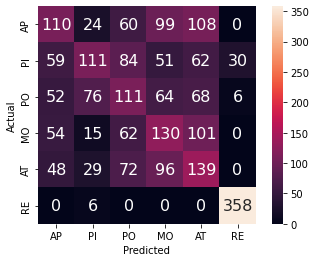

In [44]:
labels=["AP", "PI", "PO", "MO", "AT", "RE"] #Con Reposo
#labels=["AP", "PI", "PO", "MO", "AT"] #Sin Reposo
df_cm = pd.DataFrame(cm, labels, labels)
ax = sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, square=True, cbar=True, fmt='g')
ax.set_ylim(0, 6) 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
ax.invert_yaxis() 
plt.show()

# **Metrics**

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy: ', "%.2f" % (accuracy*100))
print('F1 : ', "%.2f" % (precision*100))
print('Recall_Score: ', "%.2f" % (recall*100))
print('Precision : ', "%.2f" % (f1*100))

Accuracy:  41.97
F1 :  42.12
Recall_Score:  41.97
Precision :  41.58


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.27      0.30       401
           1       0.43      0.28      0.34       397
           2       0.29      0.29      0.29       377
           3       0.30      0.36      0.32       362
           4       0.29      0.36      0.32       384
           5       0.91      0.98      0.94       364

    accuracy                           0.42      2285
   macro avg       0.42      0.43      0.42      2285
weighted avg       0.42      0.42      0.42      2285



# **All-to-one**

In [10]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import GridSearchCV

In [11]:
csv_files = glob.glob(r'C:\Users\hpalm\Desktop\Programacion\Datos_6000_MYO\Caracteristicas\*.csv')

dataframes =[]

In [12]:
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dataframes.append(df)

In [13]:
all_to_one_df = pd.concat(dataframes, ignore_index=True)


all_to_one_df.sort_values(by=all_to_one_df.columns[6],inplace=True)


all_to_one_df.reset_index(drop=True,inplace=True)

In [14]:
all_to_one_df

,MAV,WL,ZC,RMS,SSI,VAR,Label
0,0.127188,10.500000,28,0.174986,1.531006,0.030615,0
1,0.057656,4.195312,18,0.086412,0.373352,0.007376,0
2,0.082031,6.835938,30,0.140707,0.989929,0.019758,0
3,0.093281,7.632812,25,0.138821,0.963562,0.019230,0
4,0.053125,4.242188,28,0.076355,0.291504,0.005724,0
...,...,...,...,...,...,...,...
114235,0.017344,1.296875,19,0.022290,0.024841,0.000418,5
114236,0.010781,0.531250,2,0.013755,0.009460,0.000080,5
114237,0.011875,0.695312,10,0.015149,0.011475,0.000173,5
114238,0.031563,2.640625,24,0.039467,0.077881,0.001475,5


# **SVM**

In [15]:
X = all_to_one_df.iloc[:,0:5]    # features matrix 
y = all_to_one_df.iloc[:,[6]]       # target variable

In [16]:
X

,MAV,WL,ZC,RMS,SSI
0,0.127188,10.500000,28,0.174986,1.531006
1,0.057656,4.195312,18,0.086412,0.373352
2,0.082031,6.835938,30,0.140707,0.989929
3,0.093281,7.632812,25,0.138821,0.963562
4,0.053125,4.242188,28,0.076355,0.291504
...,...,...,...,...,...
114235,0.017344,1.296875,19,0.022290,0.024841
114236,0.010781,0.531250,2,0.013755,0.009460
114237,0.011875,0.695312,10,0.015149,0.011475
114238,0.031563,2.640625,24,0.039467,0.077881


In [18]:
# load one patients for trainning 
data_p = pd.read_csv(r"C:\Users\hpalm\Desktop\Programacion\Datos_6000_MYO\Caracteristicas\P01_Mejores_Caracteristicas.csv")



X_p = data_p.iloc[:,0:5]    # features matrix 
y_p = data_p.iloc[:,[6]]       # target variable

In [19]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_p = sc.transform(X_p)
#X_val = sc.transform(X_val)

In [21]:
svm_model = SVC(kernel='linear', C=1)

# Train the model on the training data
svm_model.fit(X, y)

c:\Users\hpalm\anaconda3\envs\tfradeon\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=1, kernel='linear')

In [23]:
# Predict on the testing data
y_pred = svm_model.predict(X_p)

# Calculate accuracy
accuracy = accuracy_score(y_p, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.010854341736694677


# **Confusion Matrix**

In [26]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming clf is your trained SVM model and X_test, y_test are your test data and labels, respectively
cm = confusion_matrix(y_p, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in range(6)],
                  columns = [i for i in range(6)])

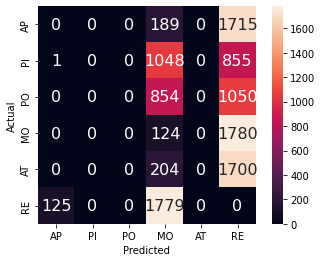

In [27]:
labels=["AP", "PI", "PO", "MO", "AT", "RE"] #Con Reposo
#labels=["AP", "PI", "PO", "MO", "AT"] #Sin Reposo
df_cm = pd.DataFrame(cm, labels, labels)
ax = sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, square=True, cbar=True, fmt='g')
ax.set_ylim(0, 6) 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
ax.invert_yaxis() 
plt.show()

# **Metrics**

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


precision = precision_score(y_p, y_pred, average='weighted')
recall = recall_score(y_p, y_pred, average='weighted')
f1 = f1_score(y_p, y_pred, average='weighted')

print('Accuracy: ', "%.2f" % (accuracy*100))
print('F1 : ', "%.2f" % (precision*100))
print('Recall_Score: ', "%.2f" % (recall*100))
print('Precision : ', "%.2f" % (f1*100))

Accuracy:  1.09
F1 :  0.49
Recall_Score:  1.09
Precision :  0.68


c:\Users\hpalm\anaconda3\envs\tfradeon\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_p, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1904
           1       0.00      0.00      0.00      1904
           2       0.00      0.00      0.00      1904
           3       0.03      0.07      0.04      1904
           4       0.00      0.00      0.00      1904
           5       0.00      0.00      0.00      1904

    accuracy                           0.01     11424
   macro avg       0.00      0.01      0.01     11424
weighted avg       0.00      0.01      0.01     11424



c:\Users\hpalm\anaconda3\envs\tfradeon\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hpalm\anaconda3\envs\tfradeon\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hpalm\anaconda3\envs\tfradeon\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
